In [1]:
from sklearn.datasets.mldata import fetch_mldata
import numpy as np
import tempfile
import urllib
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from matplotlib import pyplot as plt
import pydotplus
from IPython.display import Image  
from sklearn import model_selection

%matplotlib inline

Загрузим данные

In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric" 
raw_data = urllib.urlopen(url) 
credit=np.genfromtxt(raw_data) 
X,y = credit[:,:-1], credit[:,-1:].squeeze() 
print X.shape, y.shape

(1000, 24) (1000,)


Обучим решающее дерево глубины 3 и нарисуем его.

In [3]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [4]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

2017-03-13 16:16:51.750 dot[12580:60194411] XType: failed to connect - Error Domain=NSCocoaErrorDomain Code=4099 "The connection to service named com.apple.fonts was invalidated." UserInfo={NSDebugDescription=The connection to service named com.apple.fonts was invalidated.}
2017-03-13 16:16:51.750 dot[12580:60194411] Font server protocol version mismatch (expected:5 got:0), falling back to local fonts
2017-03-13 16:16:51.750 dot[12580:60194411] XType: unable to make a connection to the font daemon!
2017-03-13 16:16:51.750 dot[12580:60194411] registering /System/Library/Fonts/*, /System/Library/Fonts/Base/*, and /Library/Fonts/* locally



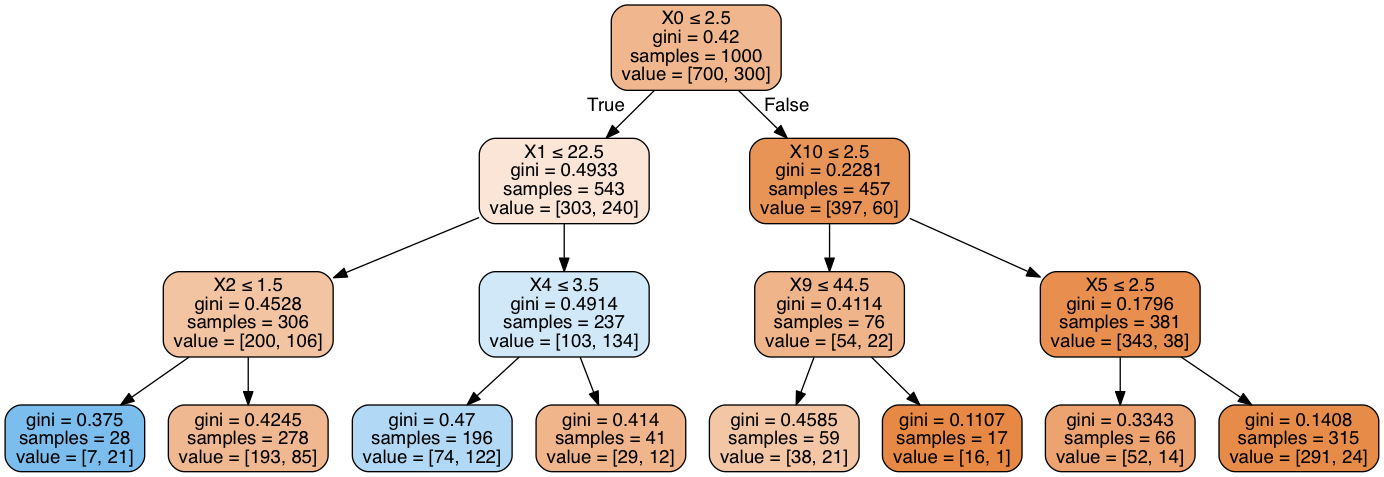

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Интерпретация работы дерева. Объяснение результатов.
Видим, что:


первое разделение происходит по признаку отвечающему состояние расчетной учетной записи. (Если мы хотим давать кредит, мы должны быть уверены, что человек потом сможет его выплачивать, поэтому важно знать доходы человека)

Далее важный параметр - период выплаты кредита.

Для выплоты кредита важно также наличие поручителя - человека, обязующегося перед банком в случае неисполнения обязательств, возложенных по кредиту на заемщика, выполнить их за него полностью или частично.

Видим, что дерево легко интерпретировать и объяснить его работу человеку даже не знакомому с ml.

# Графики зависимости качества на кросс-валидации и на обучающей выборке в зависимости от глубины дерева

Качество будем оценивать по метрике f1-score.

In [12]:
cvs = []
train_score = []
for max_depth in range(1, 40):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    score = np.mean(model_selection.cross_val_score(clf, X, y, scoring='f1', cv=40))
    clf.fit(X, y)
    train_score.append(f1_score(clf.predict(X), y))
    cvs.append(score)

Качество на кросс-валидации отобразим синим графиком. Качество на обучающей выборке - красным.

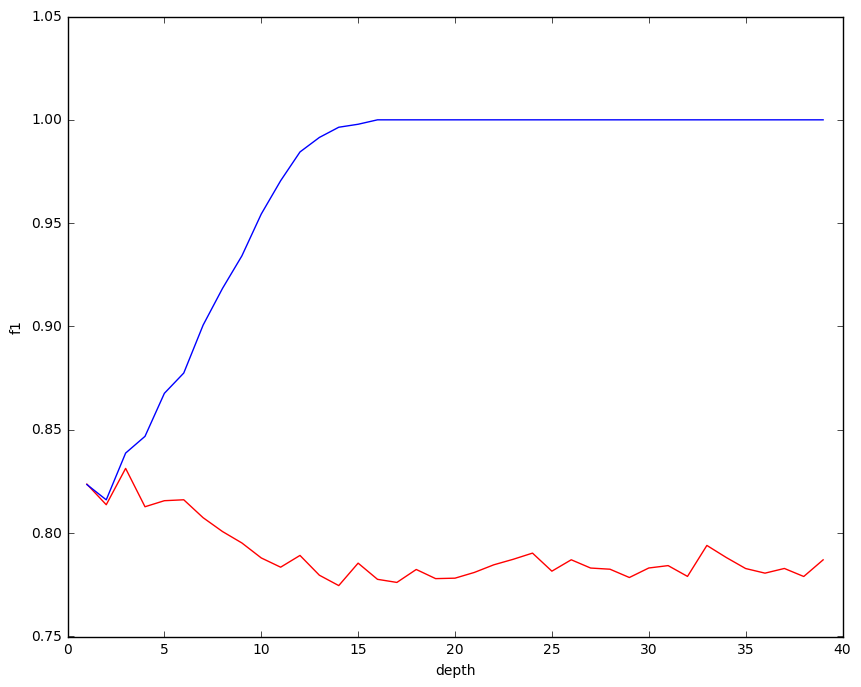

In [13]:
plt.figure(figsize=(10, 8))
plt.ylabel('f1')
plt.xlabel('depth')
plt.plot(range(1, len(cvs) + 1), cvs, c='red')
plt.plot(range(1, len(train_score) + 1), train_score, c='blue')

Качество на обучающей выборке растет, поскольку дерево переобучается, как только оно достигает максимальной глубины оно идеально предсказывает качество на обучающей выборке, плохое качество на кросс-валидации показывает, что такое глубокое дерево плохо обобщает данные.

Видим, что качество на кросс-валидации падает, поскольку дерево переобучаясь на очередных фолдах показывает плохое качество на оставшихся.